In [ ]:
raw_data.head(10)

In [1]:
import pandas as pd
import numpy as np

In [2]:
# read in data
raw_data = pd.read_csv("healthcare-dataset-stroke-data.csv")
raw_data = raw_data.drop("id", axis=1)
raw_data.shape

(5110, 11)

### Data Cleaning and Preparation

The data appears to have "Unknowns" in the smoking_status column.

In [ ]:

# TODO Display the percentage of data that has "Unknown" smoking_status
# TODO 
# TODO Display the percentage of the data with NaN bmi



We begin by looking at the number of missing values there are in the dataset.

In [4]:
raw_data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Let us observe the distribution of the data before and after we drop the null values in the BMI column.

In [5]:
dropped_data = raw_data.dropna(axis=0, subset="bmi") # TODO 

In [6]:
# distribution of stroke label before and after
raw_stroke_counts = raw_data.loc[:, "stroke"].value_counts()
dropped_stroke_counts = dropped_data.loc[:, "stroke"].value_counts()

print(raw_stroke_counts[0] / raw_stroke_counts[1])
print(dropped_stroke_counts[0] / dropped_stroke_counts[1])

19.522088353413654
22.48803827751196


In [7]:
raw_hyper_counts = raw_data.loc[:, "hypertension"].value_counts()
dropped_hyper_counts = dropped_data.loc[:, "hypertension"].value_counts()

print(raw_hyper_counts[0] / raw_hyper_counts[1])
print(dropped_hyper_counts[0] / dropped_hyper_counts[1])


9.261044176706827
9.88470066518847


<AxesSubplot:title={'center':'Distribution of Smoking Status Before Dropped Data'}>

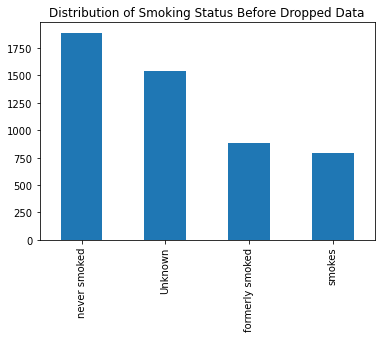

In [8]:
raw_data.loc[:, "smoking_status"].value_counts().plot(kind="bar", title="Distribution of Smoking Status Before Dropped Data")

<AxesSubplot:title={'center':'Distribution of Smoking Status After Dropped Data'}>

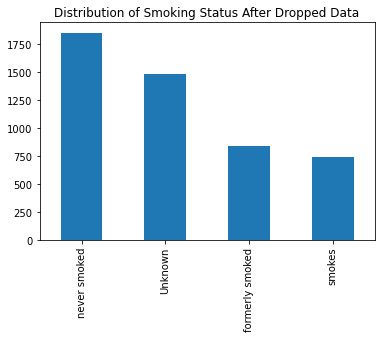

In [9]:
dropped_data.loc[:, "smoking_status"].value_counts().plot(kind="bar", title="Distribution of Smoking Status After Dropped Data")

In [16]:
binary_data_x = pd.get_dummies(dropped_data.iloc[:, :10], columns=["ever_married", "Residence_type"], drop_first=True)
data_X = pd.get_dummies(binary_data_x, columns=["gender", "work_type", "smoking_status"])
data_Y = dropped_data.iloc[:, 10].values.ravel()


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

scaler = StandardScaler()
pca = PCA()
clf = SVC()
pipeline = Pipeline([("scaler", scaler),
                     ("pca", pca),
                     ("svm", clf)])

param_grid = {
    "pca__n_components": list(range(5, 20)),
    "svm__kernel": ["linear", "rbf", "poly"]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="f1")
pred_Y = cross_val_predict(grid_search, data_X, data_Y, cv=10)

print("Accuracy: ", f1_score(data_Y, pred_Y))
print(classification_report(data_Y, pred_Y))

Accuracy:  0.018099547511312215
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4700
           1       0.17      0.01      0.02       209

    accuracy                           0.96      4909
   macro avg       0.56      0.50      0.50      4909
weighted avg       0.92      0.96      0.94      4909

